In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
# import seaborn as sns

os.getcwd()

'/home/mgteus/workspace/neuro/transformers_andrej'

In [2]:
from attention_model import Head, get_batch1d, get_batch2d, RMSELoss, MultiHeadAttention, get_dataloader, PositionEncoding, Transformers

In [3]:
# from torchtune.modules import RotaryPositionalEmbeddings

In [4]:
np.random.random()

0.705946952943495

In [5]:
# CONTEXT_LEN = 128
# BATCH_SIZE = 2028
# DROPOUT = 0.1
# LEARNING_RATE = 1e-4
# NUM_HEADS = 2
# HEAD_SIZE = 1
# NUM_EPOCHS = 1e4
# NUM_BLOCKS = 2
CONTEXT_LEN = 64
BATCH_SIZE = 512
DROPOUT = 0.2
LEARNING_RATE = 1e-4
NUM_HEADS = 2
HEAD_SIZE = 1
NUM_EPOCHS = 1e4
NUM_BLOCKS = 1
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
DEVICE, NUM_EPOCHS

('cpu', 10000.0)

In [7]:
model = Transformers(num_blocks=NUM_BLOCKS,
                        num_heads = NUM_HEADS
            , context_len = CONTEXT_LEN
            , batch_size = BATCH_SIZE
            , dropout = DROPOUT
            , head_output_dim=HEAD_SIZE)

model = model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [8]:
# Criar o DataLoader
dataloader = get_dataloader(split='train', batch_size=BATCH_SIZE, context_len=CONTEXT_LEN, device=DEVICE)

In [9]:
loss_list = []
epoch = 0
print('starting training', datetime.now())
for xb, yb in dataloader:
    while epoch <= NUM_EPOCHS:
        # xb, yb = get_batch2d(context_len=CONTEXT_LEN, batch_size=BATCH_SIZE, split='train', device=DEVICE)
        optimizer.zero_grad(set_to_none=True)
        predictions = model(xb)
        predictions = predictions.to(DEVICE)
        # print(predictions.shape)
        loss = RMSELoss(predictions.view(BATCH_SIZE*CONTEXT_LEN, NUM_HEADS), yb.view(BATCH_SIZE*CONTEXT_LEN, NUM_HEADS))
        # print(loss)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.cpu().detach().numpy())
        if epoch%(NUM_EPOCHS/10)==0:
            print(f"iter. {epoch} - loss = {loss.item():4f}", datetime.now())
        epoch+=1
print('end train', datetime.now())

starting training 2024-12-01 17:50:31.161081


/home/mgteus/workspace/neuro/.neuro/lib/python3.10/site-packages/torch/utils/data/dataloader.py:595: UserWarning: pin memory device is set and pin_memory flag is not used then device pinned memory won't be usedplease set pin_memory to true, if you need to use the device pin memory
  warnings.warn(warn_msg)


iter. 0 - loss = 0.487791 2024-12-01 17:50:31.465028
iter. 1000 - loss = 0.248778 2024-12-01 17:51:02.171702
iter. 2000 - loss = 0.147157 2024-12-01 17:51:32.755975
iter. 3000 - loss = 0.061798 2024-12-01 17:52:01.444199
iter. 4000 - loss = 0.009223 2024-12-01 17:52:31.282787
iter. 5000 - loss = 0.008508 2024-12-01 17:53:02.008518
iter. 6000 - loss = 0.008388 2024-12-01 17:53:32.844986
iter. 7000 - loss = 0.008360 2024-12-01 17:54:01.966960
iter. 8000 - loss = 0.008350 2024-12-01 17:54:31.956033
iter. 9000 - loss = 0.008345 2024-12-01 17:55:01.989627
iter. 10000 - loss = 0.008339 2024-12-01 17:55:32.332392
end train 2024-12-01 17:55:36.204648


In [10]:
loss.cpu().detach().numpy()

array(0.00833913, dtype=float32)

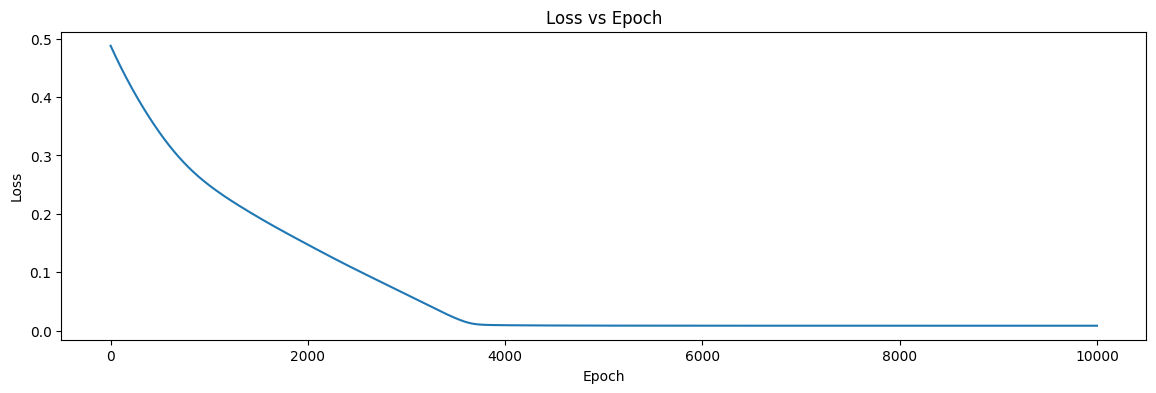

In [11]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(loss_list)
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [12]:
np.std(loss_list)

0.17734818

In [13]:
# Criar o DataLoader
dataloader_test = get_dataloader(split='test', batch_size=BATCH_SIZE, context_len=CONTEXT_LEN, device=DEVICE)

In [14]:
for txb, tyb in dataloader_test:
    break

/home/mgteus/workspace/neuro/.neuro/lib/python3.10/site-packages/torch/utils/data/dataloader.py:595: UserWarning: pin memory device is set and pin_memory flag is not used then device pinned memory won't be usedplease set pin_memory to true, if you need to use the device pin memory
  warnings.warn(warn_msg)


In [15]:
txb.shape, tyb.shape

(torch.Size([512, 64, 2]), torch.Size([512, 64, 2]))

In [16]:
tpredb = model(txb)

In [17]:
tpred = model(txb).cpu().detach().numpy()
ty = tyb.cpu().detach().numpy()
tx = txb.cpu().detach().numpy()
tpred.shape, ty.shape, tx.shape

((512, 64, 2), (512, 64, 2), (512, 64, 2))

In [18]:
tx[0, 0:3, :]

array([[0.676552  , 0.34271678],
       [0.66287637, 0.34243172],
       [0.65363216, 0.35301176]], dtype=float32)

In [19]:
tpred[0, 0:4,:]

array([[0.6745026 , 0.3333654 ],
       [0.66091245, 0.33410072],
       [0.65238243, 0.34913653],
       [0.64375716, 0.3555212 ]], dtype=float32)

In [20]:
tpred[0, 2,:]

array([0.65238243, 0.34913653], dtype=float32)

In [21]:
ty[0,2,:]

array([0.6443351 , 0.35537425], dtype=float32)

In [22]:
for i in range(1,4):
    print(model(txb[0:1,0:i,:])[0,-1,:].cpu().detach().numpy())

[0.6745026 0.3333654]
[0.6608341  0.33305037]
[0.6516146 0.3436934]


In [23]:
CONTEXT_LEN//16

4

In [ ]:
for i in range(1, CONTEXT_LEN):
    plt.title(f'Plot Batch 0 | step {i:03d}')
    plt.scatter(tx[0,0:i, 0], tx[0,0:i, 1],  label='Context', c=[color for color in range(len(tx[0,0:i, 0]))], alpha=0.4, marker='^')
    model_prediction = model(txb[0:1,0:i,:])[0,-1,:].cpu().detach().numpy()
    plt.scatter(model_prediction[0], model_prediction[1], label='prediction', c='r')
    plt.scatter(ty[0, i-1:i,0], ty[0, i-1:i,1], label='True', c='k', marker='^')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar(label='% context steps')
    plt.ylim(0, 1)
    plt.xlim(0,1)
    # plt.savefig(f'/home/mgteus/workspace/neuro/transformers_andrej/plots/gifs/step{i:03d}_fix.png', format='png')
    plt.close()

    # plt.show()

In [95]:
import glob
import os
from PIL import Image


# filepaths

fp_in =  f'/home/mgteus/workspace/neuro/transformers_andrej/plots/gifs/**_fix.png'
fp_out =  f'/home/mgteus/workspace/neuro/transformers_andrej/plots/test_run_fix_20s.gif'

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)

In [33]:
print(model.blocks[0].sa.heads[0].key)

Linear(in_features=2, out_features=1, bias=False)


In [58]:
print(model.blocks[0].sa.linear_both.weight)

Parameter containing:
tensor([[ 0.6349, -0.1737],
        [ 1.1087,  0.4875]], requires_grad=True)


In [18]:
print(model.blocks[0].ffwd.layer[0])

Linear(in_features=2, out_features=8, bias=True)


In [47]:
head0_key_weight = model.blocks[0].sa.heads[0].key.weight.detach().numpy()
head1_key_weight = model.blocks[0].sa.heads[1].key.weight.detach().numpy()

head0_query_weight = model.blocks[0].sa.heads[0].query.weight.detach().numpy()
head1_query_weight = model.blocks[0].sa.heads[1].query.weight.detach().numpy()


head0_values_weight = model.blocks[0].sa.heads[0].values.weight.detach().numpy()
head1_values_weight = model.blocks[0].sa.heads[1].values.weight.detach().numpy()
# query_weight = model.query.weight.detach().numpy()
# values_weight = model.values.weight.detach().numpy()

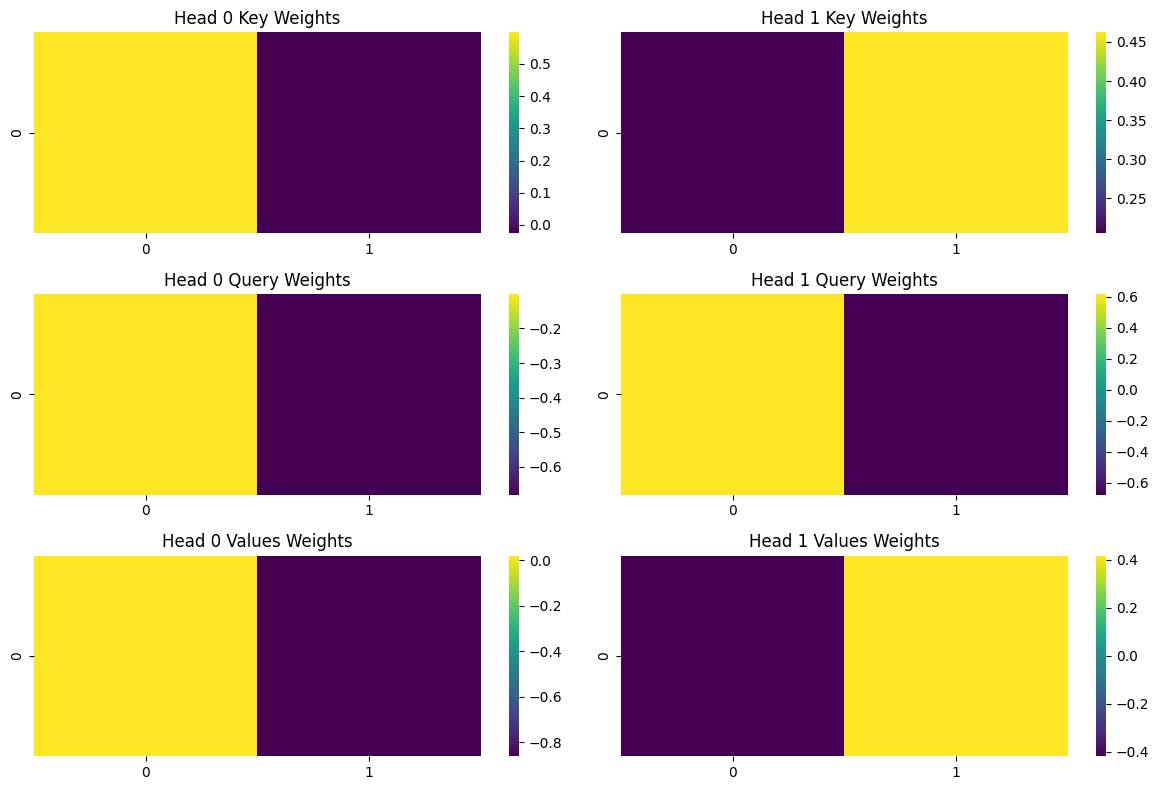

In [50]:
fig, ax = plt.subplots(3, 2, figsize=(12, 8))

sns.heatmap(head0_key_weight, cmap='viridis', ax=ax[0, 0])
ax[0,0].set_title('Head 0 Key Weights')

sns.heatmap(head1_key_weight, cmap='viridis', ax=ax[0, 1])
ax[0,1].set_title('Head 1 Key Weights')


sns.heatmap(head0_query_weight, cmap='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Head 0 Query Weights')

sns.heatmap(head1_query_weight, cmap='viridis', ax=ax[1, 1])
ax[1, 1].set_title('Head 1 Query Weights')


sns.heatmap(head0_values_weight, cmap='viridis', ax=ax[2, 0])
ax[2, 0].set_title('Head 0 Values Weights')

sns.heatmap(head1_values_weight, cmap='viridis', ax=ax[2, 1])
ax[2, 1].set_title('Head 1 Values Weights')

# sns.heatmap(query_weight, cmap='viridis', ax=ax[1])
# ax[1].set_title('Query Weights')

# sns.heatmap(values_weight, cmap='viridis', ax=ax[2])
# ax[2].set_title('Values Weights')
plt.tight_layout()
plt.show()

In [21]:
ffwd_lin1_weigths = model.blocks[0].ffwd.layer[0].weight.detach().numpy()
ffwd_lin2_weigths = model.blocks[0].ffwd.layer[2].weight.detach().numpy()

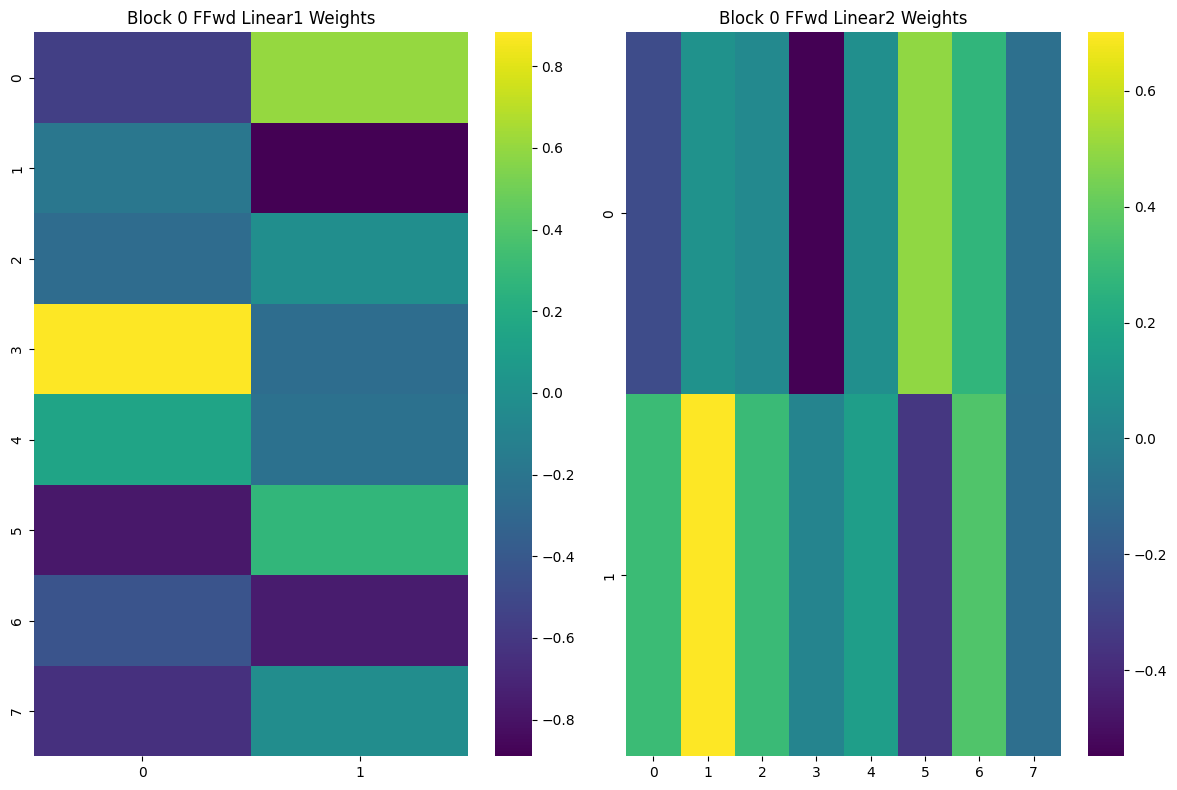

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

sns.heatmap(ffwd_lin1_weigths, cmap='viridis', ax=ax[0])
ax[0].set_title('Block 0 FFwd Linear1 Weights')

sns.heatmap(ffwd_lin2_weigths, cmap='viridis', ax=ax[1])
ax[1].set_title('Block 0 FFwd Linear2 Weights')


# sns.heatmap(query_weight, cmap='viridis', ax=ax[1])
# ax[1].set_title('Query Weights')

# sns.heatmap(values_weight, cmap='viridis', ax=ax[2])
# ax[2].set_title('Values Weights')
plt.tight_layout()
plt.show()